**<h3>Coffee Shop Sales Analysis**

**<p1>Import and Reading the Data**

In [2]:
# import library (cuz it's a canon event)

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns 
import calendar
import squarify

plt.style.use('ggplot')

In [3]:
# read the data

df = pd.read_excel('Coffee Shop Sales.xlsx')

**<p1>Data Understanding**

In [4]:
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [5]:
df.shape

(149116, 11)

In [6]:
df.dtypes

transaction_id               int64
transaction_date    datetime64[ns]
transaction_time            object
transaction_qty              int64
store_id                     int64
store_location              object
product_id                   int64
unit_price                 float64
product_category            object
product_type                object
product_detail              object
dtype: object

In [7]:
df.describe()

,transaction_id,transaction_date,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,2023-04-15 11:50:32.173609984,1.438276,5.342063,47.918607,3.382219
min,1.000000,2023-01-01 00:00:00,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,2023-03-06 00:00:00,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,2023-04-24 00:00:00,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2023-05-30 00:00:00,2.000000,8.000000,60.000000,3.750000
max,149456.000000,2023-06-30 00:00:00,8.000000,8.000000,87.000000,45.000000
std,43153.600016,NaN,0.542509,2.074241,17.930020,2.658723


In [8]:
df.describe(include = object)

,transaction_time,store_location,product_category,product_type,product_detail
count,149116,149116,149116,149116,149116
unique,25762,3,9,29,80
top,09:31:15,Hell's Kitchen,Coffee,Brewed Chai tea,Chocolate Croissant
freq,41,50735,58416,17183,3076


In [9]:
df.isna().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [10]:
df.duplicated().any()

False

**<p1>Data Visualization**

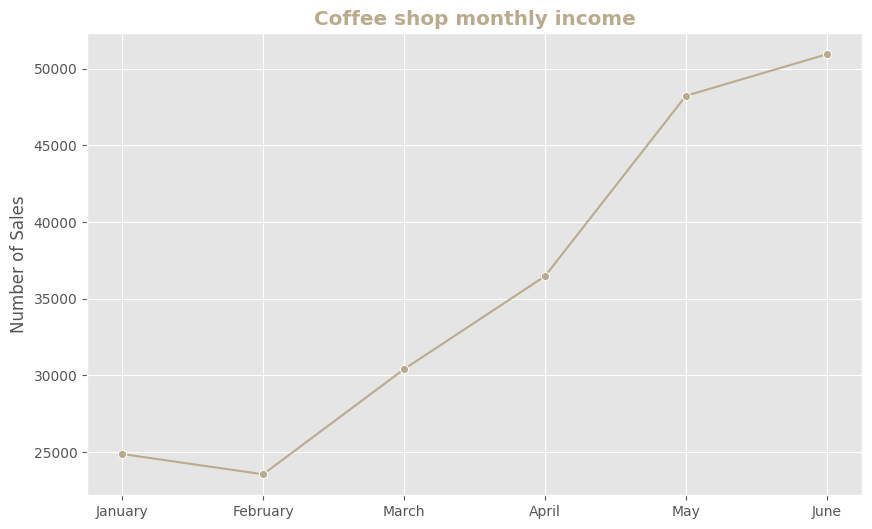

In [11]:
# calculate sales per month directly in the 'transaction_date' column
sales_per_month = df.groupby(df['transaction_date'].dt.month)['transaction_qty'].sum().reset_index()

# change the month number to the month name
sales_per_month['transaction_date'] = sales_per_month['transaction_date'].apply(lambda x: calendar.month_name[x])

# data visualization
plt.figure(figsize=(10, 6))
sns.lineplot(x='transaction_date', y='transaction_qty', data=sales_per_month, marker='o', color='#BBAB8C')

# updated plot titles to be bold and colorful
plt.title('Coffee shop monthly income', fontweight='bold', color='#BBAB8C')
plt.xlabel('')
plt.ylabel('Number of Sales')
plt.show()

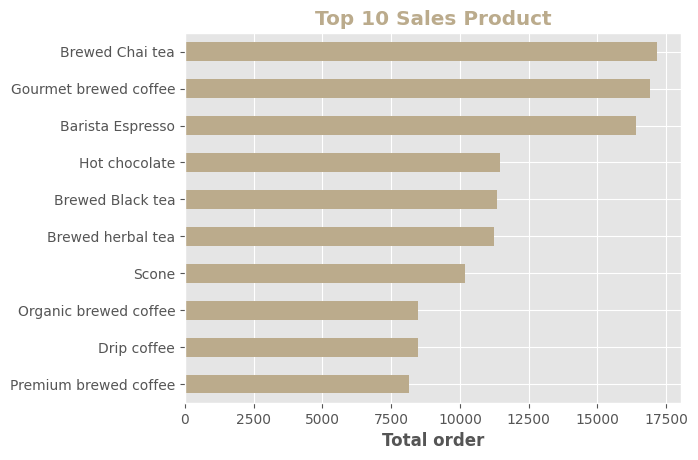

In [12]:
# sorting data in descending order based on count values
top_products = df['product_type'].value_counts().head(10).sort_values(ascending=False)

# plotting data in the form of a horizontal bar chart
ax = top_products.plot(kind='barh', color='#BBAB8C', title='Top 10 Sales Product')

# set label and title
ax.set_xlabel('Total order')
ax.set_ylabel('')
ax.title.set_color('#BBAB8C')
ax.title.set_fontweight('bold')
ax.xaxis.label.set_fontweight('bold')

# updating the ticks so that the highest ones are at the top
ax.invert_yaxis()

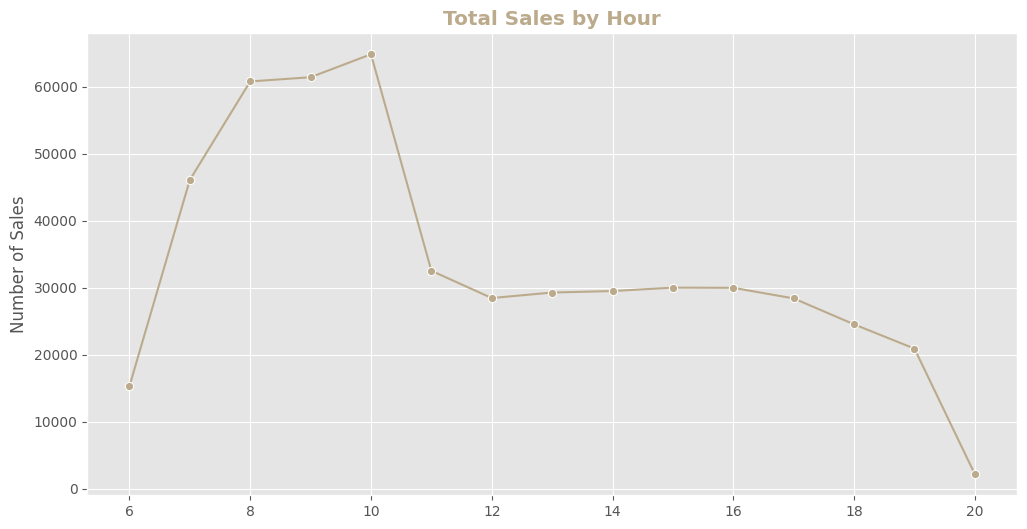

In [13]:
# make sure the 'transaction_time' column is in datetime format
df['transaction_time'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S')

time_sales = df.groupby(df['transaction_time'].dt.hour)['unit_price'].sum().reset_index(name='total_sales')

# visualization
plt.figure(figsize=(12, 6))
sns.lineplot(x='transaction_time', y='total_sales', data=time_sales, marker='o', color='#BBAB8C')

# set color and make the title bold for the title
plt.title('Total Sales by Hour', fontweight='bold', color='#BBAB8C')

# sets a color for the x-axis labels
plt.xlabel('')
plt.ylabel('Number of Sales')

plt.show()


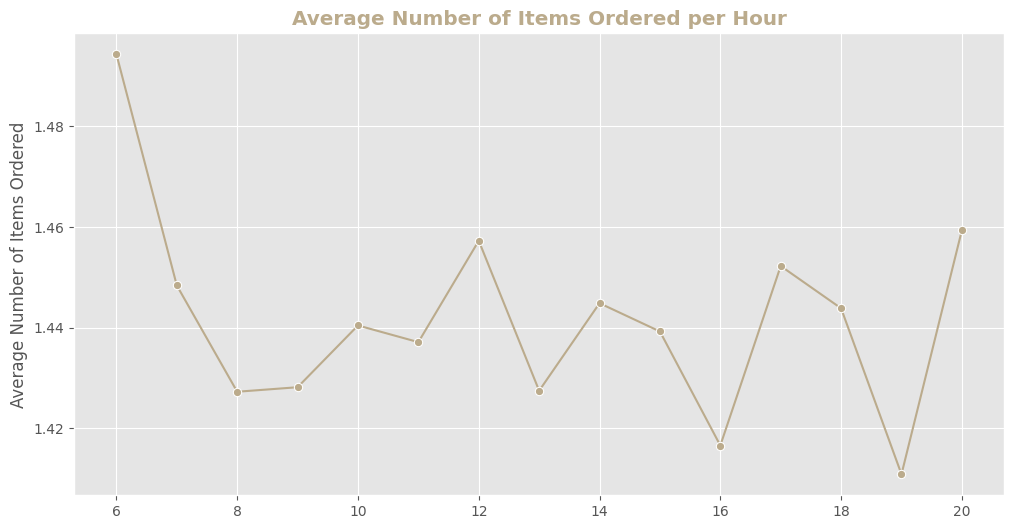

In [14]:
# calculate the average number of items ordered per hour
avg_item_per_hour = df.groupby(df['transaction_time'].dt.hour)['transaction_qty'].mean().reset_index()

# visualization
plt.figure(figsize=(12, 6))
sns.lineplot(x='transaction_time', y='transaction_qty', data=avg_item_per_hour, marker='o', color='#BBAB8C')  # Ganti warna jika diperlukan
plt.title('Average Number of Items Ordered per Hour', fontweight='bold', color='#BBAB8C')
plt.xlabel('')
plt.ylabel('Average Number of Items Ordered')
plt.show()

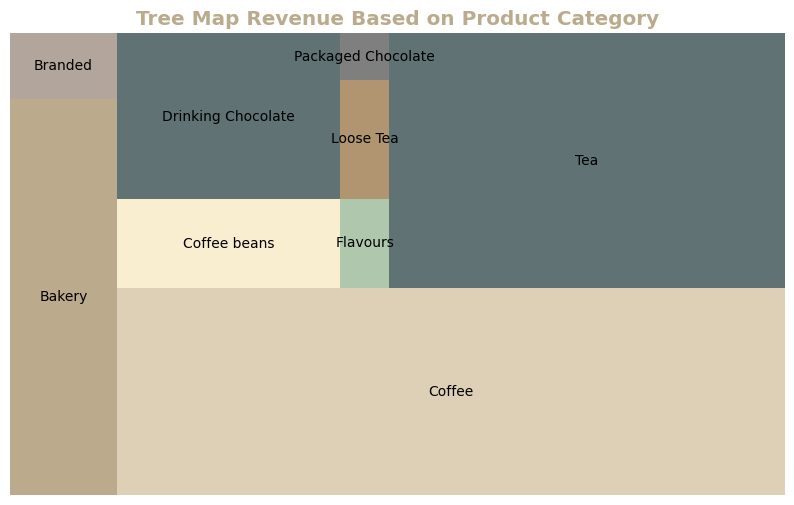

In [15]:
# analyze revenue based on product_category without adding new columns
category_revenue = df.groupby('product_category')['transaction_qty'].sum() * df.groupby('product_category')['unit_price'].mean()

# create custom palette
custom_colors = ['#BBAB8C', '#B2A59B', '#DED0B6', '#FAEED1', '#607274', '#AFC8AD', '#B19470', '#7f7f7f', '#607274', '#776B5D']

# visualize data with Tree Map using custom color palettes
plt.figure(figsize=(10, 6))
squarify.plot(sizes=category_revenue, label=category_revenue.index, color=custom_colors)
plt.title('Tree Map Revenue Based on Product Category', fontweight='bold', color='#BBAB8C')
plt.axis('off') 
plt.show()

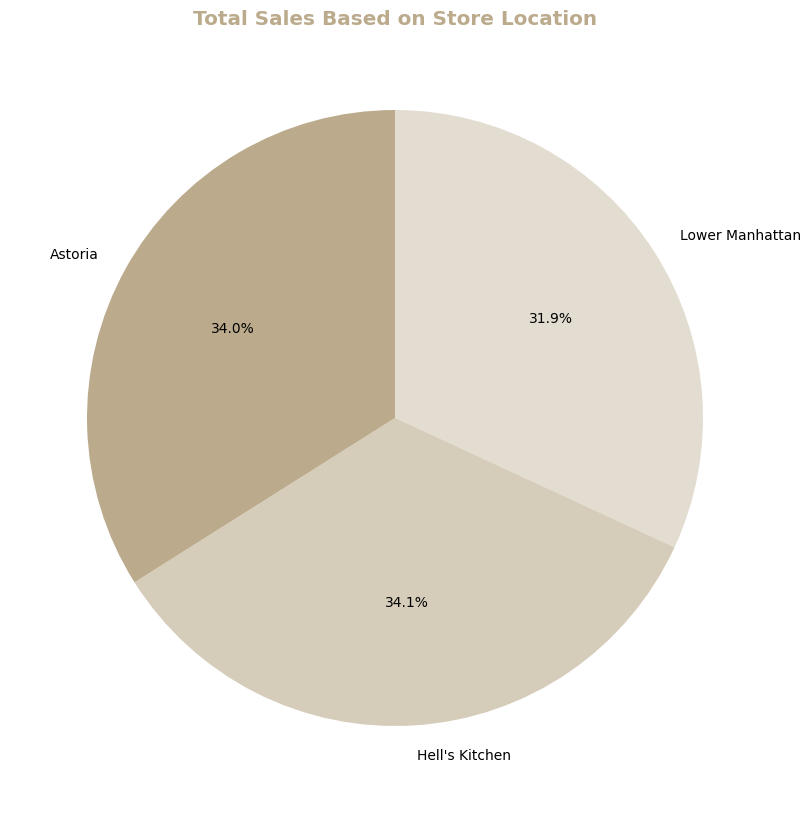

In [16]:
# analyze sales based on store_location without adding new columns
location_sales = df.groupby('store_location')['unit_price'].sum().reset_index(name='total_sales')

# create a color palette based on the given theme colors
base_color = '#BBAB8C'
custom_palette = [
    base_color,
    f'{base_color}99',  # transparency can be adjusted by changing the last two digits
    f'{base_color}66',
    f'{base_color}33',
    f'{base_color}22',
]

# visualize data with Pie Charts using custom color palettes
plt.figure(figsize=(10, 10))
plt.pie(location_sales['total_sales'], labels=location_sales['store_location'], autopct='%1.1f%%', startangle=90, colors=custom_palette)
plt.title('Total Sales Based on Store Location', fontweight='bold', color='#BBAB8C')
plt.show()